Dima's Part

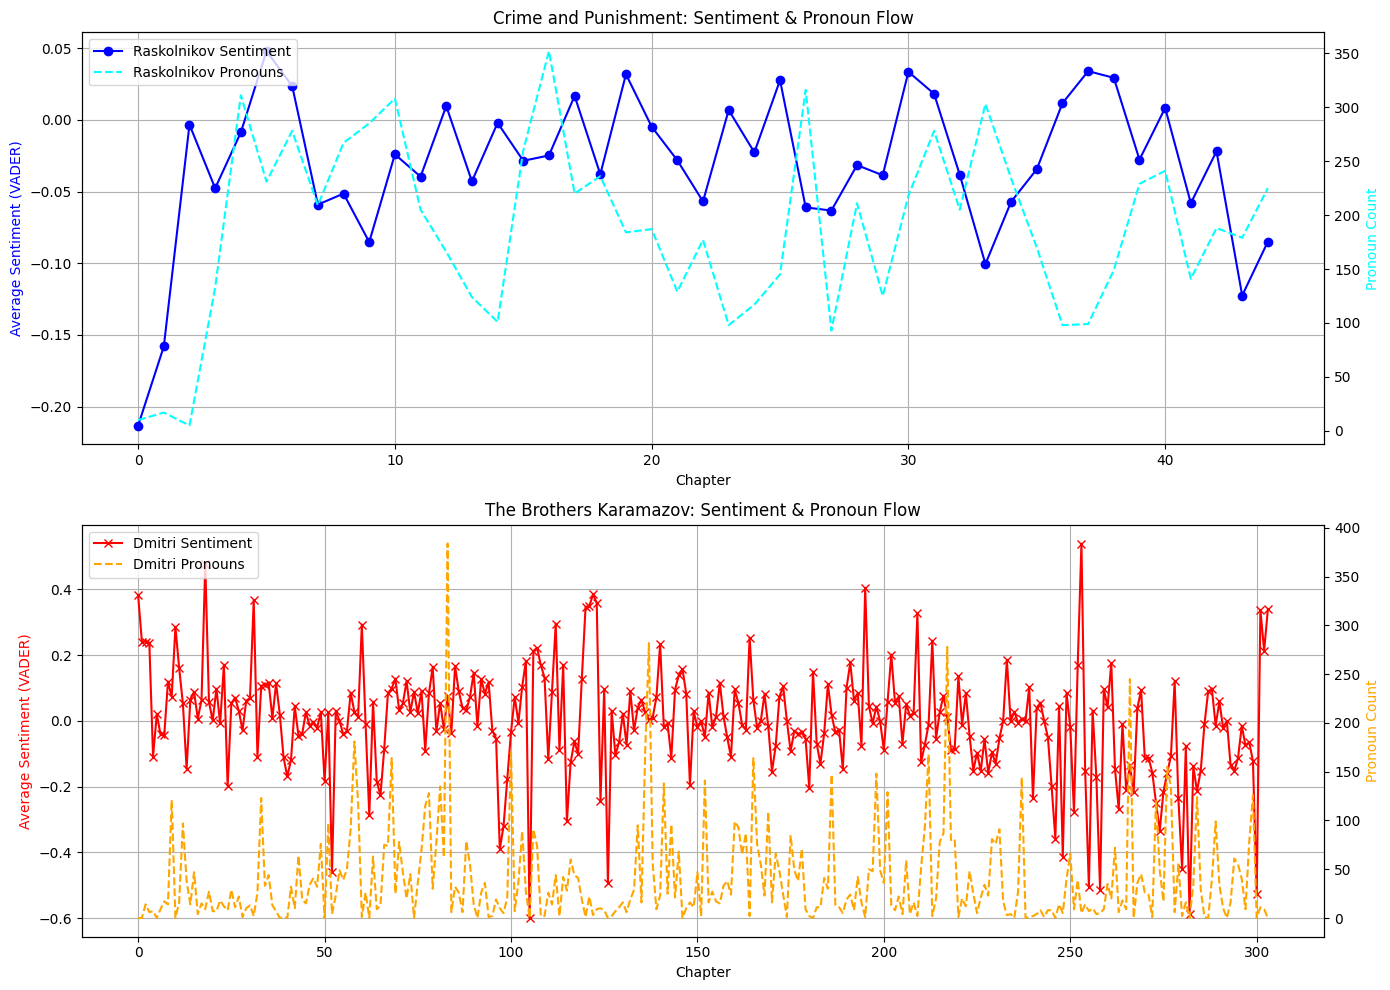

"Explanation of Sentiment Analysis in Your Code\n\nSentiment Analysis Definition\nSentiment analysis is a method in Natural Language Processing (NLP) to detect the emotional tone of a piece of text: positive, negative, or neutral.\n\nTool Used\nYou are using VADER (Valence Aware Dictionary for Sentiment Reasoning), which is especially good for literary text or social media. It gives a compound score for each sentence:\n\n-1 → extremely negative\n\n0 → neutral\n\n+1 → extremely positive\n\nSentence-Level Scoring\nIn your code, each sentence of the book is analyzed individually:\n\nsia.polarity_scores(sentence)['compound']\n\n\nThis gives a number for the emotional content of that sentence.\n\nChapter-Level Aggregation\nSentences are grouped by chapter:\n\nchapter_scores.append(sum(compute_sentiment(current)) / len(current))\n\n\nThe average compound score of all sentences in a chapter represents the overall emotional tone of that chapter.\n\nHigh positive → happy, relieved, or uplifting

In [20]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import re
from pathlib import Path

#nltk.download('vader_lexicon')
nltk.download('vader_lexicon', quiet=True)
sia = SentimentIntensityAnalyzer()

# ------------------ LOAD & PREPROCESS ------------------
def load_text(file_path: str):
    p = Path(file_path)
    if not p.exists():
        raise FileNotFoundError(f"❌ File not found: {p}")
    return p.read_text(encoding='utf-8', errors='ignore')

def normalize(text: str) -> str:
    return text.replace('\r\n', '\n')

def split_sentences(text: str):
    return [s.strip() for s in re.split(r'(?<=[.!?])\s+', text) if s.strip()]

# ------------------ SENTIMENT ------------------
def compute_sentiment(sentences):
    return [sia.polarity_scores(s)['compound'] for s in sentences]

def aggregate_chapter_sentiment(sentences, chapter_marker="CHAPTER"):
    chapter_scores = []
    current = []

    for s in sentences:
        if chapter_marker.lower() in s.lower():
            if current:
                avg_sentiment = sum(compute_sentiment(current)) / len(current)
                chapter_scores.append(avg_sentiment)
            current = []
        else:
            current.append(s)

    if current:
        avg_sentiment = sum(compute_sentiment(current)) / len(current)
        chapter_scores.append(avg_sentiment)

    return chapter_scores
# ------------------ PRONOUN COUNTS ------------------
def pronoun_counts_in_sentences(sentences, chapter_marker="CHAPTER", target={'he', 'she', 'him', 'her'}):
    counts_per_chapter = []
    current_chapter = []

    for s in sentences:
        if chapter_marker.lower() in s.lower():
            if current_chapter:
                c = sum(Counter(w.lower() for sent in current_chapter for w in sent.split())[t] for t in target)
                counts_per_chapter.append(c)
            current_chapter = []
        else:
            current_chapter.append(s)

    if current_chapter:
        c = sum(Counter(w.lower() for sent in current_chapter for w in sent.split())[t] for t in target)
        counts_per_chapter.append(c)

    return counts_per_chapter

# ------------------ FILES ------------------
Crime_file = r"..\data\Crime-punishment.txt"
Karamazov_file = r"..\data\The-BrothersKaramazov.txt"



crime_text = normalize(load_text(Crime_file))
karamazov_text = normalize(load_text(Karamazov_file))

crime_sentences = split_sentences(crime_text)
karamazov_sentences = split_sentences(karamazov_text)

# ------------------ ANALYSIS ------------------
# Sentiment per chapter
#---------------------------------------
cp_sentiments = aggregate_chapter_sentiment(crime_sentences, chapter_marker="CHAPTER")
bk_sentiments = aggregate_chapter_sentiment(karamazov_sentences, chapter_marker="PART")

cp_pronouns = pronoun_counts_in_sentences(crime_sentences, chapter_marker="CHAPTER")
bk_pronouns = pronoun_counts_in_sentences(karamazov_sentences, chapter_marker="PART")
#---------------------------------

# ------------------ PLOT ------------------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Graph 1: Crime and Punishment
ax1.plot(cp_sentiments, label="Raskolnikov Sentiment", color='blue', marker='o')
ax1_twin = ax1.twinx()
ax1_twin.plot(cp_pronouns, label="Raskolnikov Pronouns", color='cyan', linestyle='--')
ax1.set_xlabel("Chapter")
ax1.set_ylabel("Average Sentiment (VADER)", color='blue')
ax1_twin.set_ylabel("Pronoun Count", color='cyan')
ax1.set_title("Crime and Punishment: Sentiment & Pronoun Flow")
ax1.grid(True)

# Combine legends for graph 1
lines1, labels1 = ax1.get_legend_handles_labels()
lines1_twin, labels1_twin = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines1_twin, labels1 + labels1_twin, loc='upper left')

# Graph 2: The Brothers Karamazov
ax2.plot(bk_sentiments, label="Dmitri Sentiment", color='red', marker='x')
ax2_twin = ax2.twinx()
ax2_twin.plot(bk_pronouns, label="Dmitri Pronouns", color='orange', linestyle='--')
ax2.set_xlabel("Chapter")
ax2.set_ylabel("Average Sentiment (VADER)", color='red')
ax2_twin.set_ylabel("Pronoun Count", color='orange')
ax2.set_title("The Brothers Karamazov: Sentiment & Pronoun Flow")
ax2.grid(True)

# Combine legends for graph 2
lines2, labels2 = ax2.get_legend_handles_labels()
lines2_twin, labels2_twin = ax2_twin.get_legend_handles_labels()
ax2.legend(lines2 + lines2_twin, labels2 + labels2_twin, loc='upper left')

plt.tight_layout()
plt.show()

'''Explanation of Sentiment Analysis in Your Code

Sentiment Analysis Definition
Sentiment analysis is a method in Natural Language Processing (NLP) to detect the emotional tone of a piece of text: positive, negative, or neutral.

Tool Used
You are using VADER (Valence Aware Dictionary for Sentiment Reasoning), which is especially good for literary text or social media. It gives a compound score for each sentence:

-1 → extremely negative

0 → neutral

+1 → extremely positive

Sentence-Level Scoring
In your code, each sentence of the book is analyzed individually:

sia.polarity_scores(sentence)['compound']


This gives a number for the emotional content of that sentence.

Chapter-Level Aggregation
Sentences are grouped by chapter:

chapter_scores.append(sum(compute_sentiment(current)) / len(current))


The average compound score of all sentences in a chapter represents the overall emotional tone of that chapter.

High positive → happy, relieved, or uplifting chapters.

High negative → tense, threatening, or climactic chapters.

Narrative Arc
By plotting these chapter-level sentiment scores, you can see the emotional ups and downs of the story, which often corresponds to:

Rising tension → negative dips

Climax → extreme negative or positive

Resolution → neutral or positive recovery

Enhancement with Pronouns
Tracking pronouns alongside sentiment shows character activity, giving context to when a character is emotionally involved in the story.'''



In [6]:
from pathlib import Path
import os

print("Current working directory:", os.getcwd())
print("Data folder exists:", Path("data").exists())
print("Contents of current directory:", list(Path(".").iterdir()))

Current working directory: C:\Users\moham\Natural Language Proccessing\notebooks
Data folder exists: False
Contents of current directory: [WindowsPath('1_AppliedNLP_Session1_FrequentWords.ipynb'), WindowsPath('2_AppliedNLP_Session1_Adverbs.ipynb'), WindowsPath('3_AppliedNLP_Session1_Punctuation.ipynb'), WindowsPath('4_AppliedNLP_Session1_GenderLanguage.ipynb'), WindowsPath('5_AppliedNLP_Session1_ColorWords.ipynb'), WindowsPath('character_sentiment.py'), WindowsPath('Extra_Code.ipynb')]
